###  **Project Summary & Key Points**

- **Goal:** Detect fraudulent or unusual transactions automatically.

**Techniques Used:**
- Isolation Forest: Splits data recursively; anomalies isolated quickly.
- One-Class SVM: Learns normal transaction pattern; flags deviations as anomalies.

**Observations:**
- Most transactions are normal; anomalies are extremely rare (imbalanced dataset).
- Isolation Forest is generally faster and works well with high-dimensional datasets.
- One-Class SVM is more sensitive but requires careful tuning of nu and gamma.

**Real-World Impact:** Helps banks and fintech companies prevent fraud and save millions by flagging suspicious transactions early

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


### 2. Load Dataset 

In [3]:
# Example: Credit Card Fraud Dataset (Kaggle)
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

df = pd.read_csv("Data/creditcard.csv")

print("Dataset shape:", df.shape)
print(df.head())


Dataset shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

### 3. Data Preprocessing

In [4]:
# Check for missing values
print(df.isnull().sum())

# Features scaling (especially Amount)
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

# Drop original Amount column if needed
X = df.drop(['Time', 'Amount', 'Class'], axis=1)
y = df['Class']  # 0: normal, 1: fraud


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### 4. Train Isolation Forest 

In [6]:
# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.0017, random_state=42)
y_pred_iso = iso_forest.fit_predict(X)

# Convert predictions: 1 -> normal, -1 -> anomaly
y_pred_iso = [0 if x==1 else 1 for x in y_pred_iso]

# Evaluate
print("Isolation Forest Performance:")
print(confusion_matrix(y, y_pred_iso))
print(classification_report(y, y_pred_iso))


Isolation Forest Performance:
[[283969    346]
 [   353    139]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.29      0.28      0.28       492

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807



### One Class SVM 

In [7]:
# Train One-Class SVM
ocsvm = OneClassSVM(nu=0.0017, kernel="rbf", gamma=0.01)
ocsvm.fit(X[y==0])  # Train only on normal transactions

y_pred_svm = ocsvm.predict(X)
y_pred_svm = [0 if x==1 else 1 for x in y_pred_svm]

# Evaluate
print("One-Class SVM Performance:")
print(confusion_matrix(y, y_pred_svm))
print(classification_report(y, y_pred_svm))


One-Class SVM Performance:
[[283804    511]
 [   179    313]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.38      0.64      0.48       492

    accuracy                           1.00    284807
   macro avg       0.69      0.82      0.74    284807
weighted avg       1.00      1.00      1.00    284807



### Visualization of Anomalies

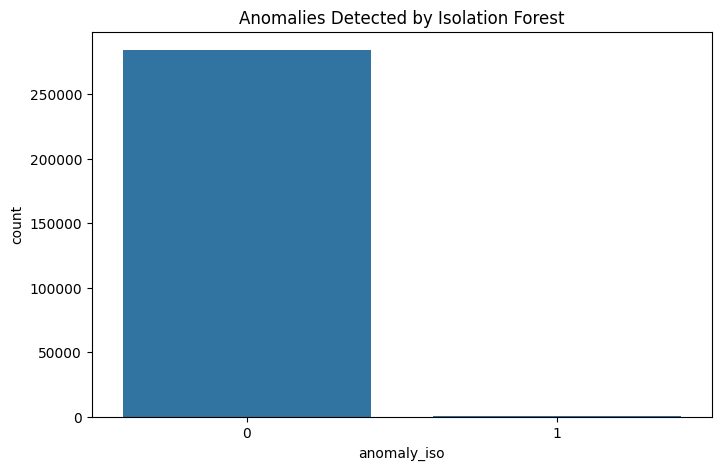

In [8]:
# Plot anomalies detected by Isolation Forest
df['anomaly_iso'] = y_pred_iso

plt.figure(figsize=(8,5))
sns.countplot(x='anomaly_iso', data=df)
plt.title("Anomalies Detected by Isolation Forest")
plt.show()


**✅ Conclusion:**

- One-Class SVM is better for detecting rare fraudulent transactions in this dataset.

- Isolation Forest is safer for normal transaction detection but misses many frauds.